<a href="https://colab.research.google.com/github/AshDoExist/vehicle_emmission/blob/main/vehicle_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Model Evaluation on Test Data ---

              precision    recall  f1-score   support

           A       0.40      0.40      0.40         5
           B       0.25      0.33      0.29         6
           C       0.57      0.44      0.50         9

    accuracy                           0.40        20
   macro avg       0.41      0.39      0.40        20
weighted avg       0.43      0.40      0.41        20



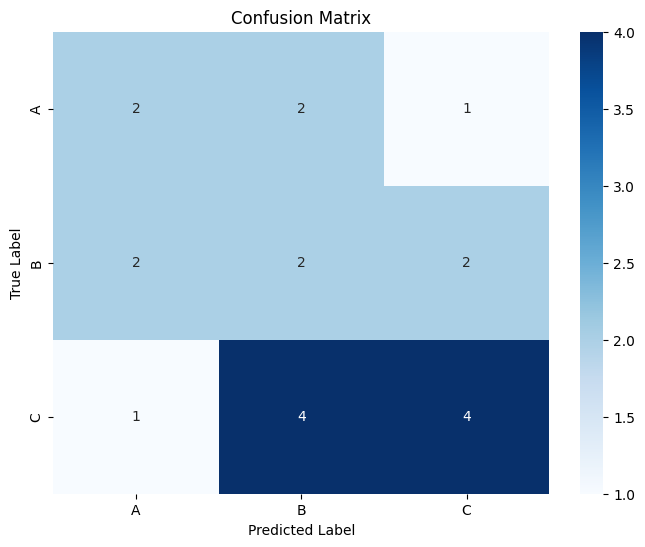

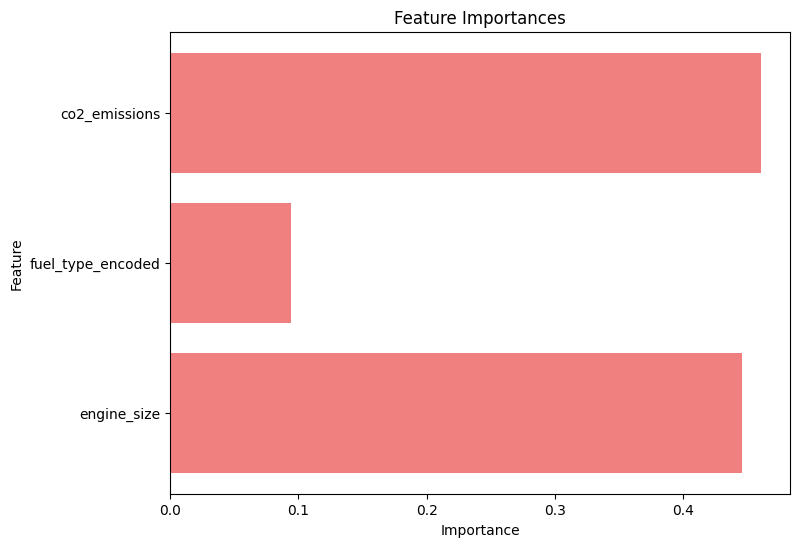

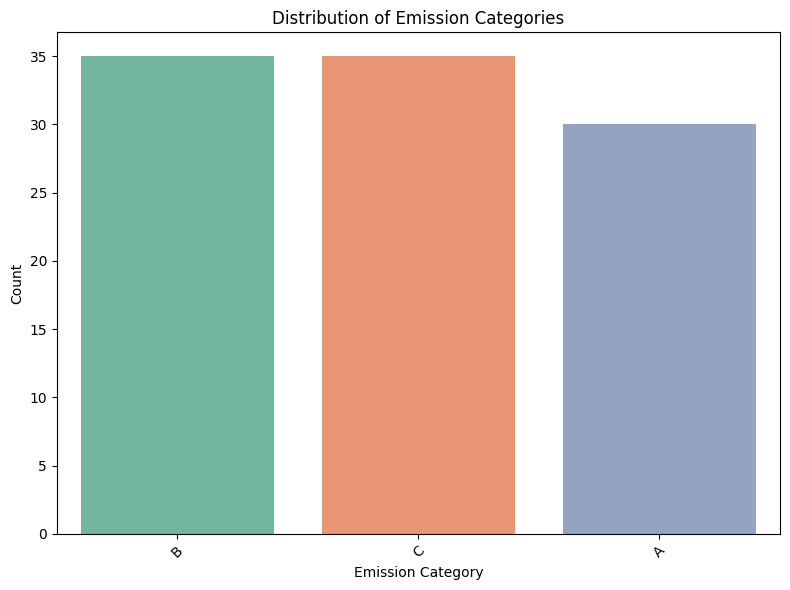


--- Predict Emission Category for a New Vehicle ---
Enter engine size (e.g. 2.0): 2
Enter fuel type (petrol, diesel, electric): petrol
Enter CO2 emissions (e.g. 150): 150

✅ Predicted Emission Category: C


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("vehicle_emissions.csv")

fuel_encoder = LabelEncoder()
df['fuel_type_encoded'] = fuel_encoder.fit_transform(df['fuel_type'])

category_encoder = LabelEncoder()
df['emission_category_encoded'] = category_encoder.fit_transform(df['emission_category'])

X = df[['engine_size', 'fuel_type_encoded', 'co2_emissions']]
y = df['emission_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n--- Model Evaluation on Test Data ---\n")
print(classification_report(y_test, y_pred, target_names=category_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_encoder.classes_, yticklabels=category_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='lightcoral')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(
    x='emission_category',
    data=df,
    palette="Set2",
    hue='emission_category',
    legend=False
)
plt.title("Distribution of Emission Categories")
plt.xlabel("Emission Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n--- Predict Emission Category for a New Vehicle ---")
try:
    engine_size_input = float(input("Enter engine size (e.g. 2.0): "))
    fuel_type_input = input("Enter fuel type (petrol, diesel, electric): ").strip().lower()
    co2_emissions_input = float(input("Enter CO2 emissions (e.g. 150): "))

    if fuel_type_input not in fuel_encoder.classes_:
        print("\n❌ Invalid fuel type! Please use one of:", list(fuel_encoder.classes_))
    else:
        fuel_type_encoded = fuel_encoder.transform([fuel_type_input])[0]

        new_data = pd.DataFrame([[engine_size_input, fuel_type_encoded, co2_emissions_input]], columns=['engine_size', 'fuel_type_encoded', 'co2_emissions'])

        predicted_label = model.predict(new_data)[0]
        predicted_category = category_encoder.inverse_transform([predicted_label])[0]

        print(f"\n✅ Predicted Emission Category: {predicted_category}")

except ValueError:
    print("\n❌ Invalid input! Please enter valid numbers for engine size and CO2 emissions.")
